# Context
A warehouse in UK has several client but does not know how the business is going. they want to figure out how the business is going answering the following question and therefore to make a better strategy of marketing.
For this, we are going to use a RFM method and K-means to segregate.

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt #Library to work with variables of date and time
from google.colab import files
import seaborn as sns
import plotly.express as px
import bokeh
import matplotlib.patches as mpatches

In [2]:
#Import file
uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [3]:
path = "/content/Online Retail.xlsx"
df = pd.read_excel(path)
print (df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.describe(include='all')

<ipython-input-4-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [5]:
#Check type var
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
#Now we check if there are empty rows
df.isna().sum(axis = 0)
     

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#now we check if there are repeated in n de factura
df = df.drop_duplicates(keep=False)
df.count()

InvoiceNo      531762
StockCode      531762
Description    530308
Quantity       531762
InvoiceDate    531762
UnitPrice      531762
CustomerID     396767
Country        531762
dtype: int64

There were 10,147 repeated InvoiceNo 

In [8]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


We change the var invoice date to datetime and customerID to string

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df["CustomerID"] = df["CustomerID"].replace(np.nan, "Unspecified")
df["Description"] = df["Description"].replace(np.nan, "Without description")
df['CustomerID'] = df['CustomerID'].astype(str)

<ipython-input-9-0847e12e69d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [10]:
#Now we split InoviceDate into date and time
df['Date'] = pd.to_datetime(df['InvoiceDate']).dt.date
df['Time'] = pd.to_datetime(df['InvoiceDate']).dt.time

In [11]:
df['total amount'] = df['Quantity']*df['UnitPrice']

In [12]:
#Now we create a column that shows where is a annulment
df['annulment'] = df['InvoiceNo'].str[:1]
aux = [] #auxiliar column where 1 is canceled
for row in df['annulment']:
        if row == 'C'  :    aux.append(1)
        else :  aux.append(0)
df['annulment'] = aux

In [13]:
#Now we check out if there is any row that is not a annulment and still has negative values in quantity or amount
def categorise(row):  
    if row['annulment'] == 0 and row['Quantity'] < 0 and row['total amount']<0:
        return 'quantity and amount negative'
    elif row['annulment'] == 0 and row['Quantity'] < 0 and row['total amount'] >= 0:
        return 'just quantity negative'
    elif row['annulment'] == 0 and row['Quantity'] >= 0 and row['total amount'] < 0:
        return 'just amount negative'
    return 'quantity and amount positive'

In [14]:
#Now we create a new column that shows if a non annulment has negative values
df['no annulment with negative'] = df.apply(lambda row: categorise(row), axis=1)

In [15]:
df['no annulment with negative'].value_counts()

quantity and amount positive    530424
just quantity negative            1336
just amount negative                 2
Name: no annulment with negative, dtype: int64

there are 1336 values which are non annulment but with negative amount, which does not make any sense, and there are 2 amount negative for non annulmment  which does not make any sense neither.

In [16]:
#We cheack out the rows what are not annulment but they have negative values
list_filter = ['just amount negative', 'just quantity negative']
df[df['no annulment with negative'].isin(list_filter)].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,total amount,annulment,no annulment with negative
2406,536589,21777,Without description,-10,2010-12-01 16:50:00,0.0,Unspecified,United Kingdom,2010-12-01,16:50:00,-0.0,0,just quantity negative
4347,536764,84952C,Without description,-38,2010-12-02 14:42:00,0.0,Unspecified,United Kingdom,2010-12-02,14:42:00,-0.0,0,just quantity negative
7188,536996,22712,Without description,-20,2010-12-03 15:30:00,0.0,Unspecified,United Kingdom,2010-12-03,15:30:00,-0.0,0,just quantity negative
7189,536997,22028,Without description,-20,2010-12-03 15:30:00,0.0,Unspecified,United Kingdom,2010-12-03,15:30:00,-0.0,0,just quantity negative
7190,536998,85067,Without description,-6,2010-12-03 15:30:00,0.0,Unspecified,United Kingdom,2010-12-03,15:30:00,-0.0,0,just quantity negative


In [17]:
#We clear df from these values
df = df[df['no annulment with negative'] != 'just amount negative']
df = df[df['no annulment with negative'] != 'just quantity negative']
df['no annulment with negative'].value_counts()

quantity and amount positive    530424
Name: no annulment with negative, dtype: int64

Now there are 24584 with negative values when should not have negative values

In [18]:
#Now we delete the column 'no annulment with negative' since is not useful anymore
del df['no annulment with negative']


In [19]:
#Now we create a column that shows if is Uk or the rest of the world
aux = [] #auxiliar column where 1 is canceled
for row in df['Country']:
        if row == 'United Kingdom'  :    aux.append("UK")
        else :  aux.append("Rest of the world")
df['is UK'] = aux
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,total amount,annulment,is UK
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30,0,UK
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,0,UK
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00,0,UK
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,0,UK
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,0,UK


In [20]:
df['month'] = pd.DatetimeIndex(df['Date']).month.astype(str)
aux=[]
for row in df['month']:
        if row == "1"  :    aux.append("01")
        elif row == "2"  :    aux.append("02")
        elif row == "3"  :    aux.append("03")
        elif row == "4"  :    aux.append("04")
        elif row == "5"  :    aux.append("05")
        elif row == "6"  :    aux.append("06")
        elif row == "7"  :    aux.append("07")
        elif row == "8"  :    aux.append("08")
        elif row == "9"  :    aux.append("09")
        else :  aux.append(row)
df['month'] = aux
df['year'] = pd.DatetimeIndex(df['Date']).year.astype(str)
df["year_month"] = df['year'] + "-" + df['month']
print (df.shape)
df.head()

(530424, 16)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,total amount,annulment,is UK,month,year,year_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30,0,UK,12,2010,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,0,UK,12,2010,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00,0,UK,12,2010,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,0,UK,12,2010,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,0,UK,12,2010,2010-12


In [21]:
#Data related to the month 2021-12  is not completed, so we eliminate those rows to get better averages.
df = df[df['year_month'] != '2021-12']
df.count()

InvoiceNo       530424
StockCode       530424
Description     530424
Quantity        530424
InvoiceDate     530424
UnitPrice       530424
CustomerID      530424
Country         530424
Date            530424
Time            530424
total amount    530424
annulment       530424
is UK           530424
month           530424
year            530424
year_month      530424
dtype: int64

In [22]:
df.nunique()

InvoiceNo       24556
StockCode        3957
Description      4094
Quantity          527
InvoiceDate     22340
UnitPrice        1628
CustomerID       4373
Country            38
Date              305
Time              773
total amount     6200
annulment           2
is UK               2
month              12
year                2
year_month         13
dtype: int64

There are 4373 clients which have done 24556 different transactions. for 3957 different products.


In [23]:
#How much do you sell on average per month
df.groupby(['Country']).agg({'total amount': 'sum'}).sort_values(by=['total amount'], ascending=False)

,total amount
Country,
United Kingdom,8170293.844
Netherlands,284661.540
EIRE,262709.940
Germany,221320.730
France,197230.320
Australia,136942.270
Switzerland,56340.750
Spain,54737.480
Belgium,40910.960


In [24]:
#Delete rows related to unspecified countries
df=df[(df['Country']!="Unspecified")]

In [25]:
#Now we replace the new names
df['Country'] = df['Country'].replace(['EIRE', 'RSA'], ['Ireland', 'South Africa'])

<ipython-input-25-c18afd7407bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].replace(['EIRE', 'RSA'], ['Ireland', 'South Africa'])


It can be appreciated that the label "unspecified" is negligible in terms of profitability to the whole company, and it does not add value into the analysis of segregation by country. Therefore it can be eliminated. Furthermore, we change some names for a better understanding.
EIRE is written in irish wich means Ireland
RSA is the abreviation of South Africa

# **Now we answer the following questions** <br> <br>
How much do you sell on average per month? <br>
How many sales do you have in each month? <br>
What is the month you sell the most? <br>
Who are your most important customers? <br>
What is the average amount your customers spend? <br>
What percentage of your customers have bought from you again? <br>
How is this information broken down according to the countries where you sell? <br>

# **Monetary**

In [83]:
#How much do you sell on average per month?
df.groupby(['is UK']).agg({'total amount': 'sum'}).sort_values(by=['total amount'], ascending=False)/12

,total amount
is UK,
UK,680857.820333
Rest of the world,129424.215000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d739c0c70>],
      dtype=object)

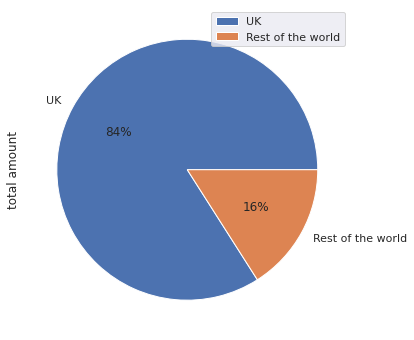

In [84]:
(df.groupby(['is UK']).agg({'total amount': 'sum'}).sort_values(by=['total amount'], ascending=False)/12).plot.pie(subplots=True, figsize=(11, 6),autopct='%1.0f%%')

In [85]:
#How many sales do you have in each month?
df_month = df[df['is UK']=='UK'].groupby(['year_month']).agg({'InvoiceNo': 'nunique', 'total amount': 'sum'}).sort_values(by=['year_month'], ascending=True)
df_month

,InvoiceNo,total amount
year_month,,
2010-12,1815,672646.040
2011-01,1231,431779.250
2011-02,1211,406288.980
2011-03,1668,557287.680
2011-04,1435,440608.551
2011-05,1856,594120.570
2011-06,1721,552339.160
2011-07,1646,563362.141
2011-08,1494,558758.620


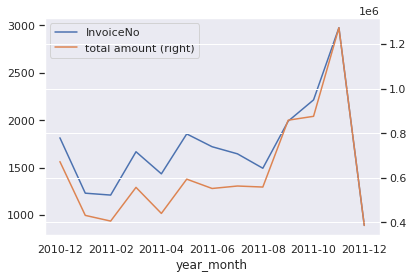

In [86]:
df_month['total amount'].plot.line(secondary_y=True, ax=df_month['InvoiceNo'].plot.line(legend=True), legend=True)

In [87]:
df_month = df[df['is UK']!='UK'].groupby(['year_month']).agg({'InvoiceNo': 'nunique', 'total amount': 'sum'}).sort_values(by=['year_month'], ascending=True)
df_month

,InvoiceNo,total amount
year_month,,
2010-12,140,72001.10
2011-01,149,125214.36
2011-02,134,89724.74
2011-03,181,123550.49
2011-04,121,50653.98
2011-05,187,125757.90
2011-06,181,136463.49
2011-07,159,114268.86
2011-08,189,142950.08


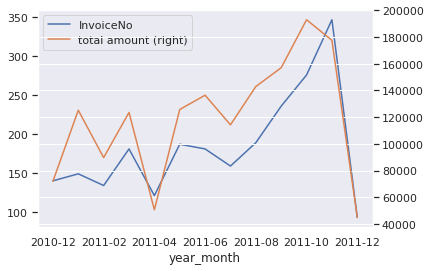

In [88]:
df_month['total amount'].plot.line(secondary_y=True, ax=df_month['InvoiceNo'].plot.line(legend=True), legend=True)

The best month in terms of sales and amount was november with 3323 sales and 1,449,922 pounds.

In [89]:
#Who are your most important customers?
df_customer = df[(df['CustomerID']!="Unspecified")].groupby(['is UK','CustomerID']).agg({'total amount': 'sum', 'InvoiceNo': 'nunique'}).sort_values(by=['total amount'], ascending=False)
df_customer1=df_customer.head(50)
df_customer1= df_customer1.reset_index()
df_customer1

,is UK,CustomerID,total amount,InvoiceNo
0,Rest of the world,14646.0,279489.02,77
1,UK,18102.0,256438.49,62
2,UK,17450.0,187162.17,55
3,Rest of the world,14911.0,132344.84,248
4,Rest of the world,12415.0,123725.45,26
5,Rest of the world,14156.0,113045.04,66
6,UK,17511.0,88125.38,46
7,UK,16684.0,65892.08,31
8,UK,13694.0,62727.98,59
9,UK,15311.0,59149.04,118


The best customer in terms of total amount are mixed but mainly into UK.

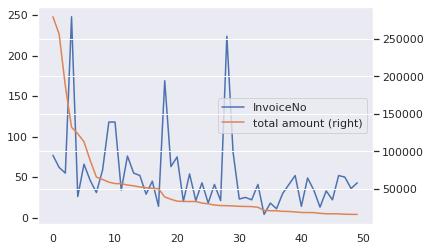

In [90]:
df_customer1['total amount'].plot.line(secondary_y=True, ax=df_customer1['InvoiceNo'].plot.line(legend=True), legend=True)

As it can be observed according total amount decrease the invoiceNo does not. there are some peacks for some client which buy a lot but not necessarily the biggest amount.

In [91]:
#What is the average amount your customers spend?
df[(df['CustomerID']!="Unspecified") & (df['total amount']>0)].groupby(['CustomerID']).agg({'total amount': 'mean'}).describe()

,total amount
count,4334.000000
mean,68.461319
std,1468.594081
min,2.150588
25%,12.404170
50%,17.778240
75%,24.996681
max,77183.600000


The mean of each client is 68 pounds

# **Frecuency**

In [35]:
df[(df['CustomerID']!="Unspecified") & (df['total amount']>0)].groupby(['CustomerID']).agg({'InvoiceNo': 'nunique'}).describe()

,InvoiceNo
count,4334.000000
mean,4.273881
std,7.701144
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,209.000000


The mean of Inovice per client is  4.2 invoice for the period of 1 year.

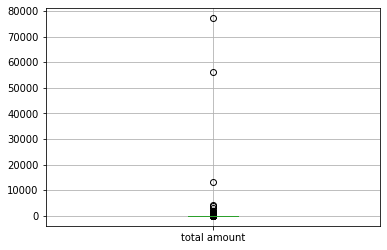

In [36]:
(df[(df['CustomerID']!="Unspecified") & (df['total amount']>0)].groupby(['CustomerID']).agg({'total amount': 'mean'})).boxplot()

The average spent by customer is 28.91 pounds

In [37]:
#What percentage of your customers have bought from you again?
df_customer[df_customer['InvoiceNo']>1]['InvoiceNo'].nunique()

64

In [38]:
df_customer.count()

total amount    4368
InvoiceNo       4368
dtype: int64

In [39]:
df_customer[df_customer['InvoiceNo']>1]['InvoiceNo'].nunique()/df_customer.count()*100

total amount    1.465201
InvoiceNo       1.465201
dtype: float64

Just 1.46% of the client buy again

# **Recency**

In [40]:
#Where was the last purchase of each client
df_last = df[(df['CustomerID']!="Unspecified")].groupby(['is UK','CustomerID']).agg({'InvoiceDate': 'last', 'InvoiceNo': 'nunique'})
#We know the range go between 2010-12 to 2011-12 so it is one year and to calculate recency we can calculate diference between last date of invoiceNo to 2011-12
df_last['last day']=pd.to_datetime('2011-12-19')
df_last['recency'] = (df_last['last day']-df_last['InvoiceDate']).dt.days
df_last = df_last.reset_index()
df_last

,is UK,CustomerID,InvoiceDate,InvoiceNo,last day,recency
0,Rest of the world,12347.0,2011-12-07 15:52:00,7,2011-12-19,11
1,Rest of the world,12348.0,2011-09-25 13:13:00,4,2011-12-19,84
2,Rest of the world,12349.0,2011-11-21 09:51:00,1,2011-12-19,27
3,Rest of the world,12350.0,2011-02-02 16:01:00,1,2011-12-19,319
4,Rest of the world,12352.0,2011-11-03 14:37:00,11,2011-12-19,45
...,...,...,...,...,...,...
4363,UK,18280.0,2011-03-07 09:52:00,1,2011-12-19,286
4364,UK,18281.0,2011-06-12 10:53:00,1,2011-12-19,189
4365,UK,18282.0,2011-12-02 11:43:00,3,2011-12-19,16
4366,UK,18283.0,2011-12-06 12:02:00,16,2011-12-19,12


In [41]:
df_last.groupby(['is UK']).agg({'recency': 'mean'})

,recency
is UK,
Rest of the world,102.643541
UK,100.323038


Here can be observed that the recency is similar in UK and outside UK

# **Now we answer the following questions** <br>

What is the average price? <br>
what is the total spent over the last 12 month? <br>
What is the average time between purchases? <br>
What is the average time between purchases? <br>



# **Average Ticket price**

In [42]:
df['StockCode'].nunique()

3957

there are 3957 different products

In [43]:
df.groupby(['CustomerID']).count()['StockCode'].describe()

count      4369.000000
mean        121.306020
std        2030.351979
min           1.000000
25%          17.000000
50%          41.000000
75%          99.000000
max      133457.000000
Name: StockCode, dtype: float64

Client buy in average 41 different products, but the range is extensive between 1 to 133457

In [44]:
df.groupby(['StockCode']).nunique()['CustomerID'].describe()

count    3957.000000
mean       67.797321
std        89.701760
min         1.000000
25%         7.000000
50%        34.000000
75%        92.000000
max       883.000000
Name: CustomerID, dtype: float64

Products are in general bought by 34 different clients. But some products are bought even for 883 different clients

In [45]:
df.groupby(['StockCode']).mean()['UnitPrice'].head(10)

StockCode
10002    1.071528
10080    0.376667
10120    0.210000
10125    0.859891
10133    0.653744
10135    1.413807
11001    1.881356
15030    0.269286
15034    0.366408
15036    1.065449
Name: UnitPrice, dtype: float64

In [46]:
df.groupby(['StockCode']).mean()['UnitPrice'].describe()

count     3957.000000
mean         8.891045
std        211.217501
min          0.000000
25%          1.250000
50%          2.386519
75%          4.394172
max      11062.060000
Name: UnitPrice, dtype: float64

The average price by product is 8.8 pounds

In [47]:
df.groupby(['InvoiceNo']).mean()['total amount'].head(10)

InvoiceNo
536365     19.874286
536366     11.100000
536367     23.227500
536368     17.512500
536369     17.850000
536370     42.793000
536371    204.000000
536372     11.100000
536373     16.241250
536374    350.400000
Name: total amount, dtype: float64

In [48]:
df[df['total amount']>0].groupby(['InvoiceNo']).mean()['total amount'].describe()

count     19945.000000
mean         64.970522
std        1357.839039
min           0.380000
25%          11.100000
50%          18.122647
75%          30.600000
max      168469.600000
Name: total amount, dtype: float64


the average amount by inoice or average ticket price is  64.97 pounds, but the range goes between 0 to 168.469 pounds

# **Total spent over the last 12 month**

In [49]:
#Total spent over the last 12 month inside UK
df[df['year_month']!='2011-12'].groupby(['year_month']).sum()['total amount'].head(12)

year_month
2010-12     744647.140
2011-01     556993.610
2011-02     496013.720
2011-03     680838.170
2011-04     491262.531
2011-05     719878.470
2011-06     688802.650
2011-07     677631.001
2011-08     701708.700
2011-09    1015307.562
2011-10    1068584.730
2011-11    1449922.050
Name: total amount, dtype: float64

Text(0, 0.5, 'Total amount in millions pounds')

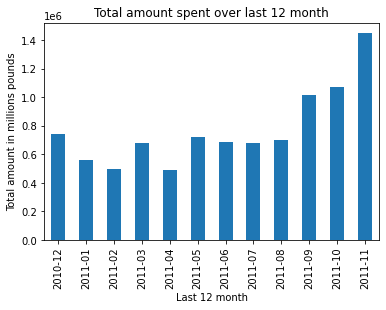

In [50]:
ax=df[df['year_month']!='2011-12'].groupby(['year_month']).sum()['total amount'].plot(kind= 'bar')
ax.set_title("Total amount spent over last 12 month")
ax.set_xlabel("Last 12 month")
ax.set_ylabel("Total amount in millions pounds")

The barchar shows how many million of pounds gas been spend throught the las 12 month. it has been excluded december, 2011 because it has only 8 days.

# **Average time between purchases.**

In [51]:
df[df['year_month']!='2011-12'].groupby(['CustomerID']).nunique()['InvoiceNo'].describe()

count    4328.000000
mean        5.443392
std        36.064607
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max      2302.000000
Name: InvoiceNo, dtype: float64

it can be observed that the range of invoice goes from 1 to 2366 with a mean of 5.4 and a median of 3. which means each customer in average buy 3 invoice in one year. In other words, it buy every 4 months.

# Continuing with the analysis, we perform a segmentation according to the RFM <br>
**¿What is the best target group to focus effort of marketing?**

The followging table shows Frecuency Monetary and Recency for each client.

In [52]:
df_rfm = df[(df['CustomerID']!="Unspecified")].groupby(['is UK','CustomerID']).agg({'InvoiceDate': 'last', 'InvoiceNo': 'nunique', 'total amount': 'sum'})
df_rfm['last day']=pd.to_datetime('2011-12-19')
df_rfm['recency'] = (df_rfm['last day']-df_rfm['InvoiceDate']).dt.days
df_rfm = df_rfm.reset_index()
df_rfm.drop(['InvoiceDate', 'last day'], axis = 1, inplace = True)
df_rfm = df_rfm.rename(columns = {'InvoiceNo':'Frecuency', 'total amount':'Monetary', 'recency':'Recency'})
df_rfm.head(10)

,is UK,CustomerID,Frecuency,Monetary,Recency
0,Rest of the world,12347.0,7,4310.00,11
1,Rest of the world,12348.0,4,1797.24,84
2,Rest of the world,12349.0,1,1757.55,27
3,Rest of the world,12350.0,1,334.40,319
4,Rest of the world,12352.0,11,1545.41,45
5,Rest of the world,12353.0,1,89.00,213
6,Rest of the world,12354.0,1,1079.40,241
7,Rest of the world,12355.0,1,459.40,223
8,Rest of the world,12356.0,3,2811.43,31
9,Rest of the world,12357.0,1,6207.67,42


In [53]:
df_rfm.describe()

,Frecuency,Monetary,Recency
count,4368.000000,4368.000000,4368.000000
mean,5.077152,1890.119811,100.545101
std,9.339965,8222.132211,100.808196
min,1.000000,-4287.630000,9.000000
25%,1.000000,288.572500,25.000000
50%,3.000000,638.725000,59.000000
75%,5.000000,1605.095000,152.000000
max,248.000000,279489.020000,382.000000


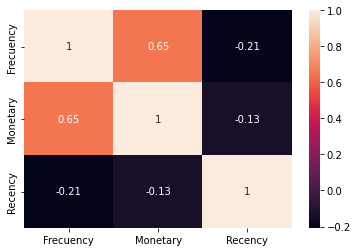

In [54]:
#correlation between Frecuency, Monetary and Recency in customer into UK
sns.heatmap(df_rfm[(df_rfm['is UK']!="UK")].corr(), annot = True)


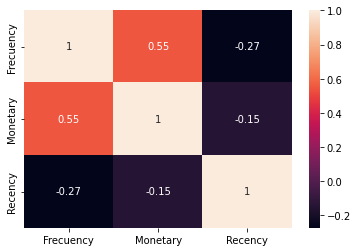

In [55]:
#correlation between Frecuency, Monetary and Recency in customer outside UK
sns.heatmap(df_rfm[(df_rfm['is UK']=="UK")].corr(), annot = True)

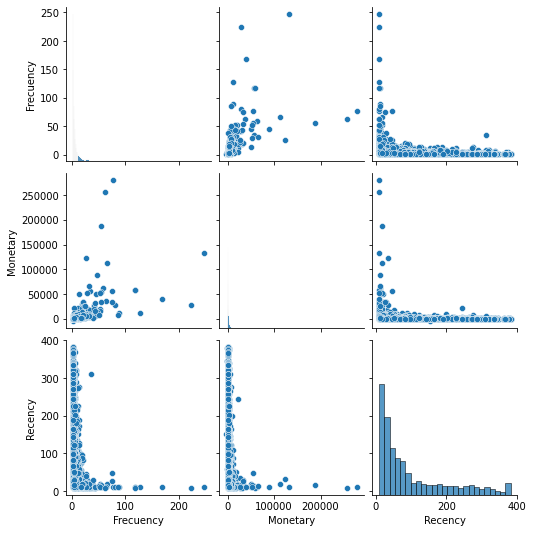

In [56]:
sns.pairplot(df_rfm)

In [57]:
aux = df_rfm['CustomerID']
aux2 = df_rfm['is UK']
df_rfm.drop(['is UK', 'CustomerID'], axis = 1, inplace = True)
df_rfm

,Frecuency,Monetary,Recency
0,7,4310.00,11
1,4,1797.24,84
2,1,1757.55,27
3,1,334.40,319
4,11,1545.41,45
...,...,...,...
4363,1,180.60,286
4364,1,80.82,189
4365,3,176.60,16
4366,16,1998.68,12


In [58]:

from sklearn import preprocessing

x = df_rfm.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_rfm_normalized = pd.DataFrame(x_scaled)
df_rfm_normalized = df_rfm_normalized.rename(columns = {0:'Frequency', 1:'Monetary', 2:'Recency'})
df_rfm_normalized['CustomerID'] = aux
df_rfm_normalized['Country'] = aux2
df_rfm_normalized.describe()

,Frequency,Monetary,Recency
count,4368.000000,4368.000000,4368.000000
mean,0.016507,0.021770,0.245429
std,0.037814,0.028974,0.270263
min,0.000000,0.000000,0.000000
25%,0.000000,0.016126,0.042895
50%,0.008097,0.017360,0.134048
75%,0.016194,0.020765,0.383378
max,1.000000,1.000000,1.000000


The following table shows scores for recency, Frecuency and Monteray. And it show in which quintile they are. For example '1' shows is in the lowest quintil, and 5 in the highest.
The label for recency are in the opposite way since a lower recency is a better score.

In [59]:
df_rfm_normalized["RecencyScore"] = pd.qcut(df_rfm_normalized["Recency"],5,labels = [5,4,3,2,1])
df_rfm_normalized["FrequencyScore"] = pd.qcut(df_rfm_normalized["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
df_rfm_normalized["MonetaryScore"] = pd.qcut(df_rfm_normalized['Monetary'], 5, labels = [1, 2, 3, 4, 5])
df_rfm_normalized["RFM_Score"] = df_rfm_normalized['RecencyScore'].astype(str) + df_rfm_normalized['FrequencyScore'].astype(str) + df_rfm_normalized['MonetaryScore'].astype(str)
df_rfm_normalized["RFM_Score"] = df_rfm_normalized["RFM_Score"].astype(str)
df_rfm_normalized

,Frequency,Monetary,Recency,CustomerID,Country,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
0,0.024291,0.030297,0.005362,12347.0,Rest of the world,5,4,5,545
1,0.012146,0.021442,0.201072,12348.0,Rest of the world,2,3,4,234
2,0.000000,0.021303,0.048257,12349.0,Rest of the world,4,1,4,414
3,0.000000,0.016288,0.831099,12350.0,Rest of the world,1,1,2,112
4,0.040486,0.020555,0.096515,12352.0,Rest of the world,3,5,4,354
...,...,...,...,...,...,...,...,...,...
4363,0.000000,0.015746,0.742627,18280.0,UK,1,2,1,121
4364,0.000000,0.015394,0.482574,18281.0,UK,1,2,1,121
4365,0.008097,0.015731,0.018767,18282.0,UK,5,3,1,531
4366,0.060729,0.022152,0.008043,18283.0,UK,5,5,5,555


In [60]:
alta = []
for row in df_rfm_normalized['RFM_Score']:

        if row == '555': alta.append('Best Customers')
        elif row == '111': alta.append('Lost Cheap Customers')
        elif row[0] == '1': alta.append('Lost Customers')
        elif row[0] == '2': alta.append('Almost Lost Customers')
        elif row[0] == '3': alta.append('Almost Lost Customers')
        elif row[2] == '5': alta.append('Big Spender')
        elif row[1] == '5': alta.append('Loyal Customers')
        elif (int(row[0]) > 3) & (int(row[1]) < 2) : alta.append('Focus Group')

        else :  alta.append('General Customers')

In [61]:
def segment (df_rfm_normalized):
    if df_rfm['RFM_Score'] == '555':
        return 'Best Customers'
    if df_rfm['RFM_Score'] == '111':
        return 'Lost Cheap Customers'
    if df_rfm['RecencyScore'] == 1:
        return 'Lost Customers'
    if df_rfm['RecencyScore'] == 2:
        return 'Almost Lost Customers'
    if df_rfm['RecencyScore'] == 3:
        return 'Almost Lost Customers'
    if df_rfm['MonetaryScore'] == 5:
        return 'Big Spenders'
    if df_rfm['FrequencyScore'] == 5:
        return 'Loyal Customers'
    if (df_rfm['RecencyScore'] > 3) & (df_rfm['FrequencyScore'] < 2):
        return 'Focus Group'
    return 'General Customers'

In [62]:
#df_rfm_normalized['Segments'] = df_rfm_normalized.apply(segment, axis =1)

In [63]:
df_rfm_normalized['Segments'] = alta
df_rfm_normalized.head(50)

,Frequency,Monetary,Recency,CustomerID,Country,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Segments
0,0.024291,0.030297,0.005362,12347.0,Rest of the world,5,4,5,545,Big Spender
1,0.012146,0.021442,0.201072,12348.0,Rest of the world,2,3,4,234,Almost Lost Customers
2,0.000000,0.021303,0.048257,12349.0,Rest of the world,4,1,4,414,Focus Group
3,0.000000,0.016288,0.831099,12350.0,Rest of the world,1,1,2,112,Lost Customers
4,0.040486,0.020555,0.096515,12352.0,Rest of the world,3,5,4,354,Almost Lost Customers
5,0.000000,0.015423,0.546917,12353.0,Rest of the world,1,1,1,111,Lost Cheap Customers
6,0.000000,0.018913,0.621984,12354.0,Rest of the world,1,1,4,114,Lost Customers
7,0.000000,0.016728,0.573727,12355.0,Rest of the world,1,1,2,112,Lost Customers
8,0.008097,0.025016,0.058981,12356.0,Rest of the world,4,3,5,435,Big Spender
9,0.000000,0.036984,0.088472,12357.0,Rest of the world,3,1,5,315,Almost Lost Customers


In [64]:
df_rfm_normalized.groupby('Segments')['CustomerID'].count()

Segments
Almost Lost Customers    1730
Best Customers            350
Big Spender               285
Focus Group               138
General Customers         833
Lost Cheap Customers      197
Lost Customers            677
Loyal Customers           158
Name: CustomerID, dtype: int64

In [65]:
df_rfm_normalized['RecencyScore'] = pd.to_numeric(df_rfm_normalized['RecencyScore'])
df_rfm_normalized['MonetaryScore'] = pd.to_numeric(df_rfm_normalized['MonetaryScore'])
df_rfm_normalized['FrequencyScore'] = pd.to_numeric(df_rfm_normalized['FrequencyScore'])

In [66]:
segment = df_rfm_normalized.groupby('Segments')['CustomerID'].nunique().sort_values(ascending = False).reset_index()

In [67]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


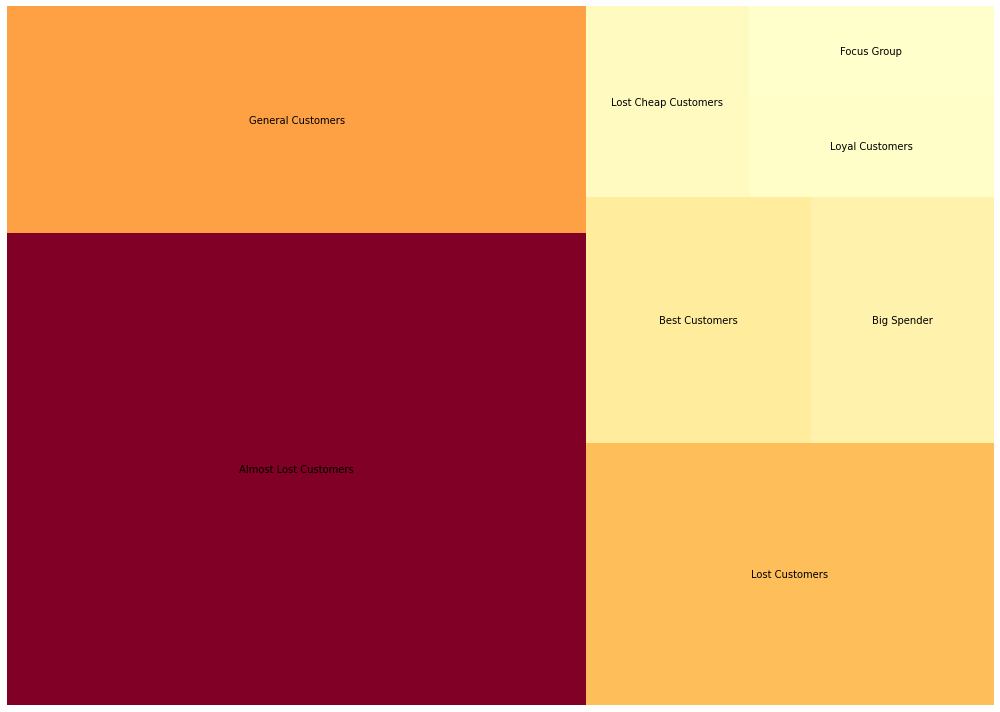

In [68]:
import squarify
cmap = plt.cm.YlOrRd
mini = min(segment['CustomerID'])
maxi = max(segment['CustomerID'])
norm = matplotlib.colors.Normalize(vmin = mini, vmax = maxi)
colors = [cmap(norm(value)) for value in segment['CustomerID']]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)
squarify.plot(sizes = segment['CustomerID'],
             label = segment['Segments'], alpha = 1, color=colors)
plt.axis('off')
plt.tight_layout()

In [69]:
df_rfm_normalized['CustomerID'].loc[(df_rfm_normalized['Segments']=='Focus Group')]

2       12349.0
17      12367.0
22      12374.0
34      12391.0
76      12442.0
         ...   
2699    15992.0
2724    16024.0
2725    16025.0
2860    16204.0
2863    16207.0
Name: CustomerID, Length: 138, dtype: object

[[  3.0758427   89.00468165]
 [  1.53663366 318.4990099 ]
 [  2.23076923 199.37660256]
 [  7.70336251  27.11699678]]


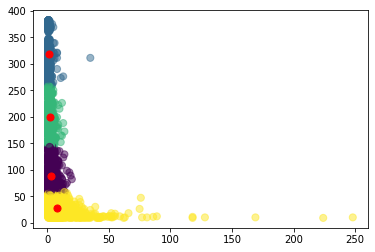

In [70]:
from sklearn.cluster import KMeans

df2 = pd.DataFrame(df_last, columns=['InvoiceNo', 'recency'])
  
kmeans = KMeans(n_clusters=4).fit(df2)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df2['InvoiceNo'], df2['recency'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

As it can be observed in color red it the group with more recency, and at the same time is the group with more quantity of invoice on other words, frecuency, and group yellow with less recency it has less quantity of invoice. However, there are a client in the yellow group which has a bad rececny, and would be interesting to recover. And into the green group would be interesting to bring them to the purple.

# **Main metrics for each segments**

**The groups are the following** <br>
Best Customers<br>
Lost Cheap Customers<br>
Lost Customers<br>
Almost Lost Customers<br>
Almost Lost Customers<br>
Big Spender<br>
Loyal Customers<br>
Focus Group<br>
Customers<br>

**And the metrics are the following** <br>
Frequency <br> 
Recency<br> 
Average Ticket Price<br> 
Total spent over the last 12 months<br>
Average time between purchases<br>


In [71]:
#pd.merge(product,customer,how='inner',left_on=['Product_ID','Seller_City'],right_on=['Product_ID','City'])
df2 = pd.merge(df,df_rfm_normalized,how='inner',left_on='CustomerID',right_on='CustomerID')
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_x,Date,Time,...,year_month,Frequency,Monetary,Recency,Country_y,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Segments
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,...,2010-12,0.137652,0.033816,0.809651,UK,1,5,5,155,Lost Customers
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,...,2010-12,0.137652,0.033816,0.809651,UK,1,5,5,155,Lost Customers
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,...,2010-12,0.137652,0.033816,0.809651,UK,1,5,5,155,Lost Customers
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,...,2010-12,0.137652,0.033816,0.809651,UK,1,5,5,155,Lost Customers
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,...,2010-12,0.137652,0.033816,0.809651,UK,1,5,5,155,Lost Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396524,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,2011-12-09,12:16:00,...,2011-12,0.000000,0.018099,0.000000,Rest of the world,5,1,3,513,Focus Group
396525,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,...,2011-12,0.000000,0.018099,0.000000,Rest of the world,5,1,3,513,Focus Group
396526,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,...,2011-12,0.000000,0.018099,0.000000,Rest of the world,5,1,3,513,Focus Group
396527,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,2011-12-09,12:16:00,...,2011-12,0.000000,0.018099,0.000000,Rest of the world,5,1,3,513,Focus Group


In [72]:
#Now we dislay all column's values
df2.columns.values

array(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country_x', 'Date', 'Time',
       'total amount', 'annulment', 'is UK', 'month', 'year',
       'year_month', 'Frequency', 'Monetary', 'Recency', 'Country_y',
       'RecencyScore', 'FrequencyScore', 'MonetaryScore', 'RFM_Score',
       'Segments'], dtype=object)

In [73]:
#Now we group by segments the metrics
df21 = df2.groupby(['Segments']).agg({'RecencyScore': 'mean', 'FrequencyScore': 'mean', 'MonetaryScore': 'mean', 'total amount': 'mean' }).reset_index()
df21 = df21.rename(columns={'total amount': 'Average ticket price'})
df22 = df2.groupby(['Segments']).agg({'total amount': 'sum', 'InvoiceNo': 'nunique', 'CustomerID': 'nunique' }).reset_index()
df22['Total spent over the last 12 months by client'] = df22['total amount']/12/df22['CustomerID']
df22['Average time between purchases in months']=df22['InvoiceNo']/df22['CustomerID']/12
df22 = df22.drop(columns=['total amount', 'InvoiceNo', 'CustomerID'])
df_summary = pd.merge(df21,df22,how='inner',left_on='Segments',right_on='Segments')
df_summary.sort_values(by=['RecencyScore'], ascending=False)

,Segments,RecencyScore,FrequencyScore,MonetaryScore,Average ticket price,Total spent over the last 12 months by client,Average time between purchases in months
1,Best Customers,5.000000,5.000000,5.000000,28.009926,909.909119,1.851905
7,Loyal Customers,4.561113,5.000000,3.929673,10.397211,116.650570,0.757911
4,General Customers,4.455313,3.433781,3.309380,12.467841,64.238817,0.276511
3,Focus Group,4.271635,1.000000,1.990685,12.223293,24.564686,0.083333
2,Big Spender,4.151612,4.683186,5.000000,21.944514,399.435061,0.841813
0,Almost Lost Customers,2.612713,3.567534,3.748030,17.764422,85.590968,0.272013
5,Lost Cheap Customers,1.000000,1.000000,1.000000,10.803939,9.176950,0.083333
6,Lost Customers,1.000000,2.540015,2.798833,18.564552,45.028865,0.164574


In [74]:
df_summary.describe()

,RecencyScore,FrequencyScore,MonetaryScore,Average ticket price,Total spent over the last 12 months by client,Average time between purchases in months
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,3.381548,3.278064,3.347075,16.521962,206.824380,0.541424
std,1.624967,1.644749,1.394635,6.236025,310.080039,0.604617
min,1.000000,1.000000,1.000000,10.397211,9.176950,0.083333
25%,2.209535,2.155011,2.596796,11.868455,39.912820,0.144264
50%,4.211623,3.500657,3.528705,15.116131,74.914892,0.274262
75%,4.481763,4.762389,4.197255,19.409543,187.346693,0.778887
max,5.000000,5.000000,5.000000,28.009926,909.909119,1.851905


In [75]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.2, point['y']-.2, str(point['val']))

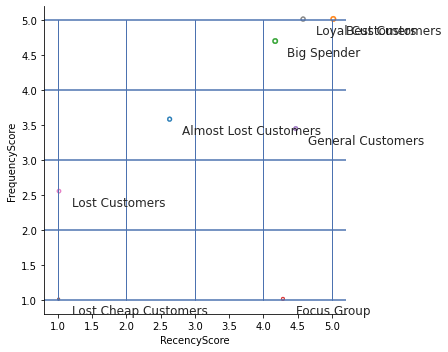

In [76]:
sns.relplot(
    data = df_summary[['RecencyScore','FrequencyScore','MonetaryScore','Segments']],
    x="RecencyScore", y="FrequencyScore", size = 'MonetaryScore', hue="Segments", legend=False, marker="$\circ$", ec="face",
)
sns.set_theme()   
plt.plot([1, 1], [1, 5], linewidth=1, color='b')
plt.plot([2, 2], [1, 5], linewidth=1, color='b')
plt.plot([3, 3], [1, 5], linewidth=1, color='b')
plt.plot([4, 4], [1, 5], linewidth=1, color='b')
plt.plot([5, 5], [1, 5], linewidth=1, color='b')
plt.axhline(y = 1, color = 'b', linestyle = '-')
plt.axhline(y = 2, color = 'b', linestyle = '-')
plt.axhline(y = 3, color = 'b', linestyle = '-')
plt.axhline(y = 4, color = 'b', linestyle = '-')
plt.axhline(y = 5, color = 'b', linestyle = '-')


label_point(df_summary.RecencyScore, df_summary.FrequencyScore, df_summary.Segments, plt.gca()) 

It can be observed, as we defined, that the focus group is in high recency, in other words, their last purchase was over the last months, but with a low frecuency, in other words, they have not bought many times. So the idea would be to increase their frequency of purchase.

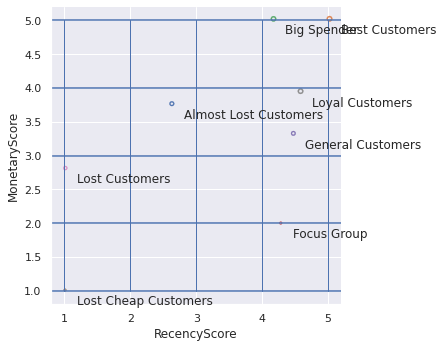

In [77]:
sns.relplot(
    data = df_summary[['RecencyScore','FrequencyScore','MonetaryScore','Segments']],
    x="RecencyScore", y="MonetaryScore", size = 'FrequencyScore', hue="Segments", legend=False, marker="$\circ$", ec="face",
)
sns.set_theme()   
plt.plot([1, 1], [1, 5], linewidth=1, color='b')
plt.plot([2, 2], [1, 5], linewidth=1, color='b')
plt.plot([3, 3], [1, 5], linewidth=1, color='b')
plt.plot([4, 4], [1, 5], linewidth=1, color='b')
plt.plot([5, 5], [1, 5], linewidth=1, color='b')
plt.axhline(y = 1, color = 'b', linestyle = '-')
plt.axhline(y = 2, color = 'b', linestyle = '-')
plt.axhline(y = 3, color = 'b', linestyle = '-')
plt.axhline(y = 4, color = 'b', linestyle = '-')
plt.axhline(y = 5, color = 'b', linestyle = '-')

label_point(df_summary.RecencyScore, df_summary.MonetaryScore, df_summary.Segments, plt.gca())

From other perspective, when we analyze from monetary vs Recency, recency stay high, but monetary no that much, this is highly probably because they also have not bought too much.

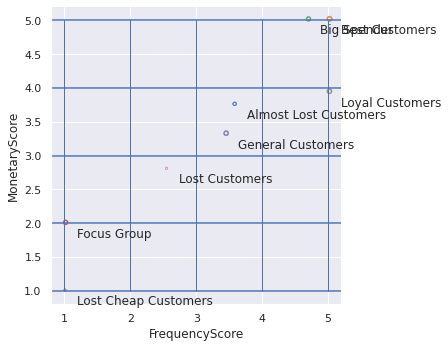

In [78]:
sns.relplot(
    data = df_summary[['RecencyScore','FrequencyScore','MonetaryScore','Segments']],
    x="FrequencyScore", y="MonetaryScore", size = 'RecencyScore', hue="Segments", legend=False, marker="$\circ$", ec="face",
)
sns.set_theme()   
plt.plot([1, 1], [1, 5], linewidth=1, color='b')
plt.plot([2, 2], [1, 5], linewidth=1, color='b')
plt.plot([3, 3], [1, 5], linewidth=1, color='b')
plt.plot([4, 4], [1, 5], linewidth=1, color='b')
plt.plot([5, 5], [1, 5], linewidth=1, color='b')
plt.axhline(y = 1, color = 'b', linestyle = '-')
plt.axhline(y = 2, color = 'b', linestyle = '-')
plt.axhline(y = 3, color = 'b', linestyle = '-')
plt.axhline(y = 4, color = 'b', linestyle = '-')
plt.axhline(y = 5, color = 'b', linestyle = '-')

label_point(df_summary.FrequencyScore, df_summary.MonetaryScore, df_summary.Segments, plt.gca())

Finally, when we analyze from the monetary vs frequency perspective. It is one of the worse group. but we know their recency is high, so we should focus in this group because it has the better potential.

In [79]:
def label_point_3d(x, y, z, val, ax):
    a = pd.concat({'x': x, 'y': y, 'z': z, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.2, point['y']+0.2, point['z']+0.2, str(point['val']))

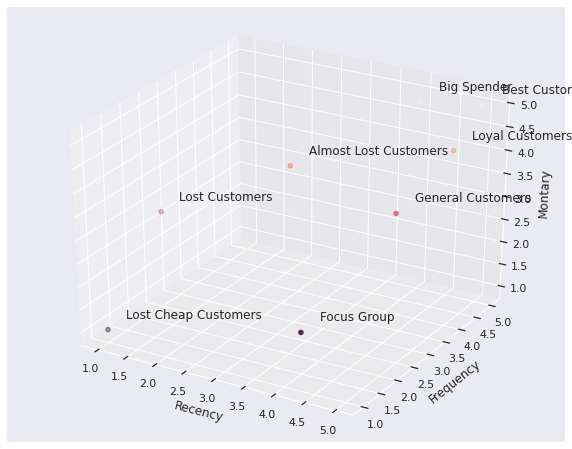

In [80]:
plt.figure(figsize = (10,8))
ax = plt.axes(projection = '3d')
fg = ax.scatter3D(df_summary['RecencyScore'],df_summary['FrequencyScore'],df_summary['MonetaryScore'], c = df_summary['MonetaryScore'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Montary')
label_point_3d(df_summary.RecencyScore, df_summary.FrequencyScore, df_summary.MonetaryScore, df_summary.Segments, plt.gca())

in this plot, it can be seen in a 3D perspective. Big spender, loyal Customer and best customer are close to the top, General customera are in a good position as well and according to the other 5 groups, 4 are lost or almost lost: Lost customer, Almost Lost Customers, and Lost cheap customer, so It would no be the best idea to focus resources here since there are low odds to have a good return of investment. On other hand, Focus group with a high recency it  higly probably to move them to top groups.

# **Facetgrit**

In [81]:
#Now we dislay all column's values
df2.columns.values

array(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country_x', 'Date', 'Time',
       'total amount', 'annulment', 'is UK', 'month', 'year',
       'year_month', 'Frequency', 'Monetary', 'Recency', 'Country_y',
       'RecencyScore', 'FrequencyScore', 'MonetaryScore', 'RFM_Score',
       'Segments'], dtype=object)

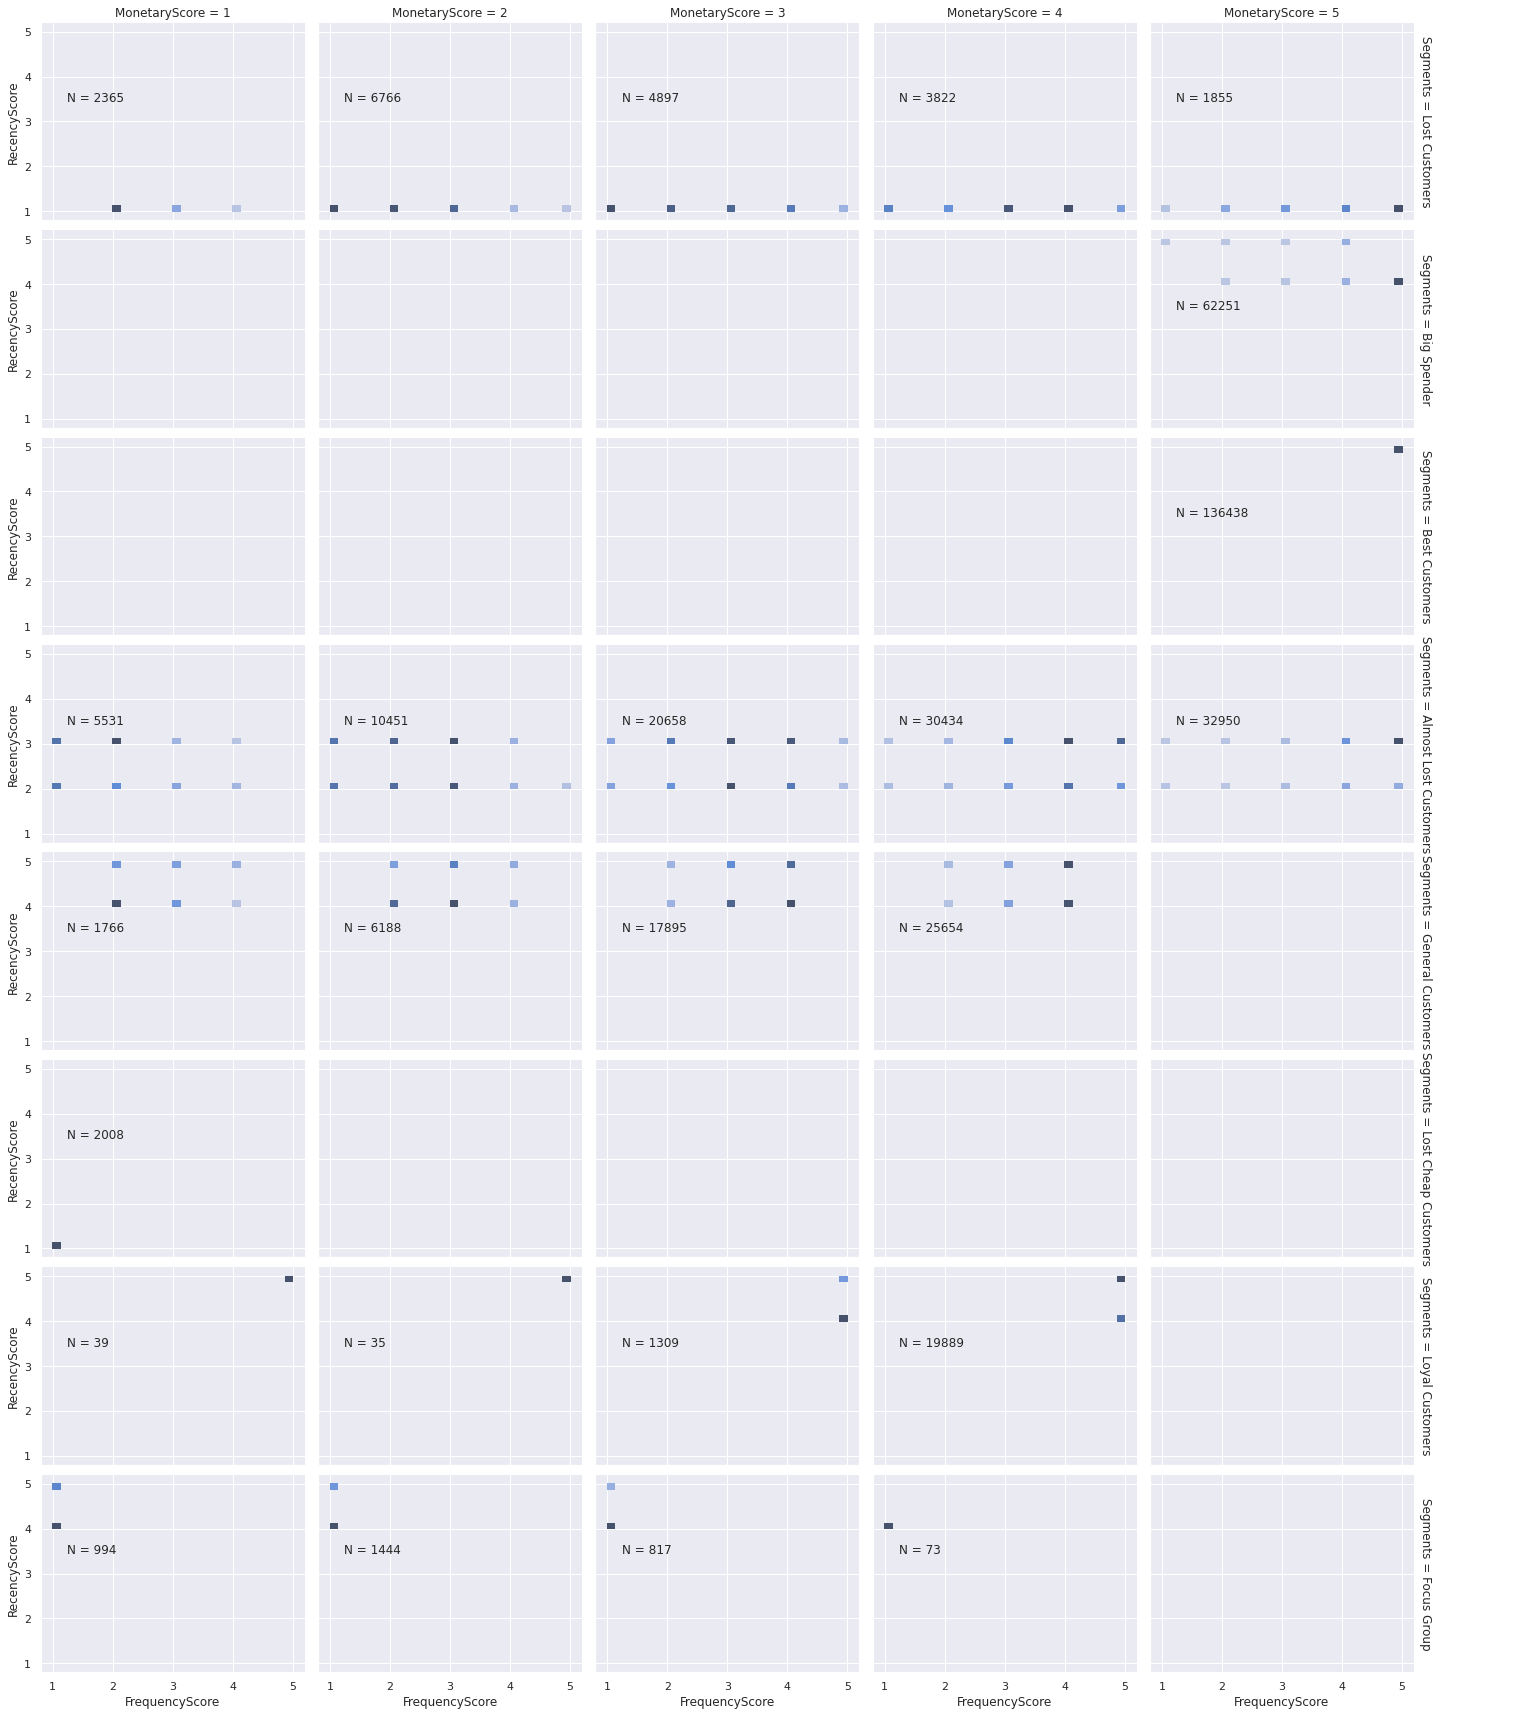

In [82]:
g = sns.FacetGrid(df2, row="Segments", col='MonetaryScore',height=3, aspect=1.4, margin_titles=True, despine=True) #aspect gives width
g.map_dataframe(sns.histplot, x="FrequencyScore", y="RecencyScore",  binwidth=0.125, binrange=(1, 5))
g.add_legend()
#g.refline(y=df2["RecencyScore"].median())
def annotate(data, **kws): #Function for showing N
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)
g.map_dataframe(annotate)
g.figure.subplots_adjust(wspace=0.05, hspace=0.05)


# **Conclusions** <br>
in the segmentation there are 4 big groups: <br><br>
The first are the top: Big spenders, loyal customers and best customers. which have the best performance <br><br>
The second group is the worse group: Lost cheap customer, Lost customer, almost lost customer, which have the worst performance. <br><br>
General Customer which is closer to top customer than lost customer. <br><br>
And finally Focus Group, which are where we should focus resources since there are better odds to improve their performance get them better to the top group. 

